In [2]:
import numpy as np 
import pandas as pd
from sklearn.datasets import make_classification

import matplotlib.pyplot as plt
from matplotlib import rcParams
rcParams['axes.spines.top'] = False
rcParams['axes.spines.right'] = False

X, y = make_classification(
    n_samples=1000, 
    n_features=3, 
    n_redundant=0,
    n_clusters_per_class=1,
    random_state=42
)

df = pd.concat([pd.DataFrame(X), pd.Series(y)], axis=1)
df.columns = ['x1', 'x2', 'x3', 'y']
# 5 random rows
df.sample(5)

,x1,x2,x3,y
63,1.659326,1.724697,0.863671,1
386,0.109681,-0.319848,-1.385493,0
139,-2.193402,-0.625677,3.241353,1
341,1.380001,-0.608590,0.476847,1
352,2.139423,1.804348,-0.425103,0


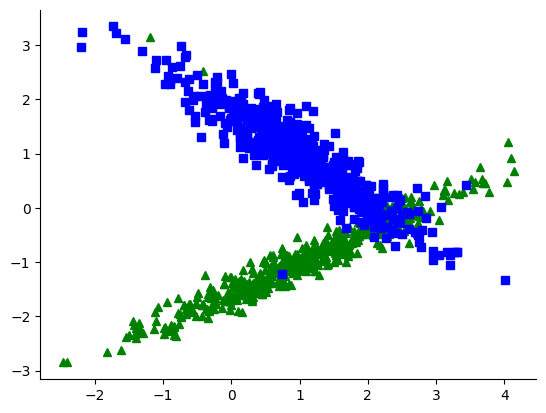

In [3]:
d1, d2 = 0, 2
plt.plot(X[:, d1][y == 0], X[:, d2][y == 0], 'g^')
plt.plot(X[:, d1][y == 1], X[:, d2][y == 1], 'bs')
plt.show()

In [15]:

def make_y(weights, data, regression=True):
    if regression:
        print('Returning regression targets')
        return np.dot(data, weights)
    else:
        print('Returning classification targets')
        return 1*(np.dot(data, weights)>0)*2 - 1

def make_w(n_features, n_sig=3):
    # randomly select some (n_sig) weights to make significant (>0.85 or <-0.85)
    big_ws = np.random.choice([ i for i in range(n_features) ], size=n_sig, replace=False)
    # print(big_ws)
    ws = np.random.rand(n_features)*.2-.1 # set all weights to between -.1 to .1
    # Update the randomly selected significant weights
    for i in big_ws:
        ws[i] = np.random.rand()*0.15 + (1-0.15) # set weight to be between 0.85 and 1.0
        ws[i] *= 2*int(np.random.rand()<0.5)-1 # randomly set positive or negative
    return ws

# reg = 'regression'
reg = 'classification'

n_features = 15
n_rows = 1000
X = np.random.rand(n_rows, n_features) * 100 - 50
w = make_w(n_features)
y = make_y(w, X, regression=reg=='regression')
df = pd.DataFrame(X)
df['y'] = y

# Save data as csv and weights as binary
print('Saving data and weights')
data_fname = reg+'_dataset.csv'
weights_fname = reg+'_weights'
df.to_csv(data_fname)
with open(weights_fname,'w') as f:
    w.tofile(f)

Returning classification targets
Saving data and weights


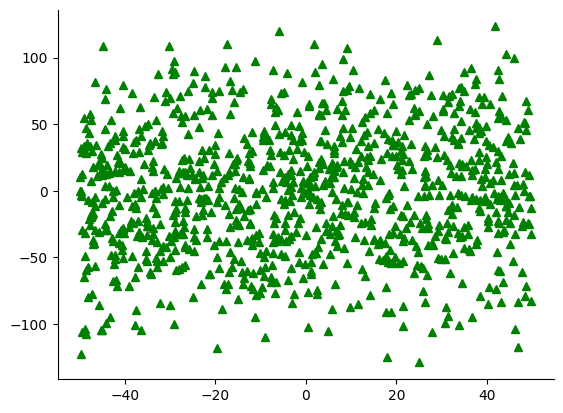

In [5]:
d1 = 13
plt.plot(X[:, d1], y, 'g^')
plt.show()

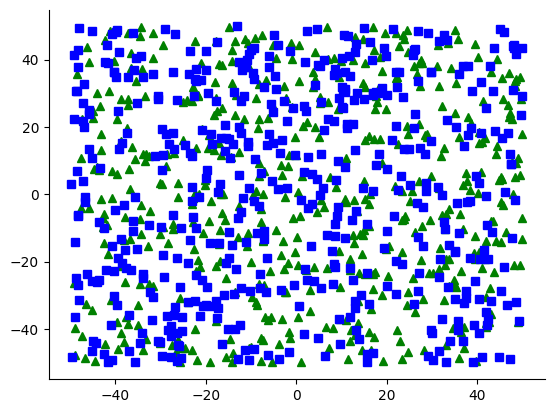

In [6]:
d1, d2 = 1, 14
plt.plot(X[:, d1][y < 0], X[:, d2][y < 0], 'g^')
plt.plot(X[:, d1][y > 0], X[:, d2][y > 0], 'bs')
plt.show()

In [7]:
import sys
sys.path.insert(0,'./csc-566-student/')
import py566

ModuleNotFoundError: No module named 'py566'

In [ ]:
# clf = py566.svm.SVMClassifier(kernel='linear')
# for i in range(X.shape[1]):
#     X_new = X[:, :i]
#     print('Excluding feature ',i)
#     clf.fit(X,y)
#     y_pred = clf.predict(X)
#     scores = y_pred==y
#     print(100*scores.sum()/len(scores))

In [13]:
np.fromfile('regression_weights')

array([ 0.08543653,  0.0847291 , -0.02671067, -0.0270101 ,  0.08354153,
        0.09137284, -0.00687485,  0.88877117,  0.08040003,  0.94824374,
       -0.03223899, -0.96243044,  0.00858734, -0.09556714,  0.03139093])